# Monthly Revenue and Total order of each store

# Importing necessary libraries

In [409]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

Getting the required data

In [410]:
data_order = pd.read_csv("C:\\Users\\sreeram\\Desktop\\personal info\\FoodHub\\level2codingtest\\orders_test (2).csv")
data_store = pd.read_csv("C:\\Users\\sreeram\\Desktop\\personal info\\FoodHub\\level2codingtest\\store_test (2).csv")

In [12]:
#Print the shape of 
print(data_order.shape)
print(data_store.shape)

(1000, 5)
(10, 3)


In [14]:
#print Top 5 records

data_order.head(5)


,id,total,customer_id,store_id,order_date
0,1,19.36,21,1,3/3/2020
1,2,8.85,88,8,4/2/2020
2,3,5.53,41,3,3/3/2020
3,4,12.90,96,8,3/15/2020
4,5,8.19,25,7,1/21/2020


In [15]:
data_store.head(5)

,id,name,address
0,1,Valdez Inc,"18321 Joseph Lodge\nChristineland, NH 69026"
1,2,Stevens-Barr,Unit 0902 Box 4445\nDPO AE 19637
2,3,Taylor Ltd,"3433 Hill Forest\nCharlesmouth, KY 16037"
3,4,"Adams, Barrett and Thomas",Unit 5633 Box 1666\nDPO AA 06032
4,5,Edwards-Mcdaniel,"2426 Holly Isle\nJefferytown, WA 97681"


In [42]:
data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   total        1000 non-null   float64
 2   customer_id  1000 non-null   int64  
 3   store_id     1000 non-null   int64  
 4   order_date   1000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 39.2+ KB


In [51]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10 non-null     int64 
 1   name     10 non-null     object
 2   address  10 non-null     object
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


# Exploratory Data Analysis

1-> Finding Null Values

2-> Finding Outliers

3-> All the numerical Values

4-> Distribution of the data

# Finding the null values

In [19]:
data_order.isnull().sum()/len(data_order)*100

id             0.0
total          0.0
customer_id    0.0
store_id       0.0
order_date     0.0
dtype: float64

In [11]:
data_store.isnull().sum()/len(data_store)*100

id         0.0
name       0.0
address    0.0
dtype: float64

Checking for a special character in the data

In [ ]:
spl_character = ('!','@','#','$','%','&','(',')','/','?')

for spl in data_store.values,data_order.values:
    for spl_char in spl_character:
        if spl_char in spl:
            print([spl_char],[spl])

The data doesn't have any missing values

Extracting Date,Year,Month from Order_date column

In [411]:
data_order["Year"] = pd.DatetimeIndex(data_order['order_date']).year
#data_order["date"] = pd.DatetimeIndex(data_order['order_date']).date
Mon = {'January':1,"February":2,"March":3,"April":4,"May":5}
data_order["Month"] = pd.DatetimeIndex(data_order['order_date']).month

In [592]:
data_order["Month"].replace({1:"January",2:'February',3:'March',4:'April',5:'May'},inplace = True)

In [593]:
data_order["Month"]

0         March
1         April
2         March
3         March
4       January
         ...   
995       March
996       April
997     January
998       March
999    February
Name: Month, Length: 1000, dtype: object

# Finding the Outliers

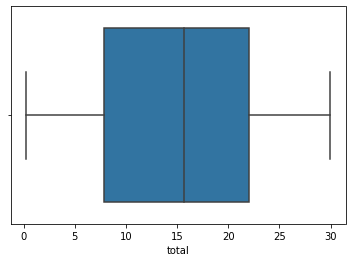

In [90]:
sb.boxplot(data_order['total'])

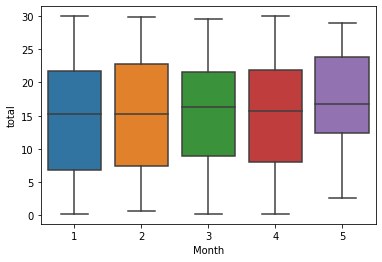

In [92]:
sb.boxplot(data = data_order,y ='total',x = 'Month')

The data does not have any outliers, it is good to go with further analysis

# All the Numerical Values

In [594]:
Feature_numerical_order = [feature for feature in data_order.columns if data_order[feature].dtypes == "int64" or "float64" ]

In [595]:
Feature_numerical_store = [feature for feature in data_store.columns if data_store[feature].dtypes != "O"]

In [596]:
data_order[Feature_numerical_order].head()

,id,total,customer_id,store_id,order_date,Year,Month
0,1,19.36,21,1,3/3/2020,2020,March
1,2,8.85,88,8,4/2/2020,2020,April
2,3,5.53,41,3,3/3/2020,2020,March
3,4,12.90,96,8,3/15/2020,2020,March
4,5,8.19,25,7,1/21/2020,2020,January


In [415]:
data_store[Feature_numerical_store].head()

,id
0,1
1,2
2,3
3,4
4,5


# Distribution of the data

In [93]:
from scipy.stats import skew

In [152]:
data_order_new = data_order.drop(['order_date','date',"Year",'Month'],axis=1)

id
0.0


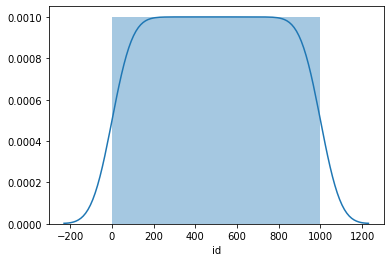

total
-0.044851070140417656


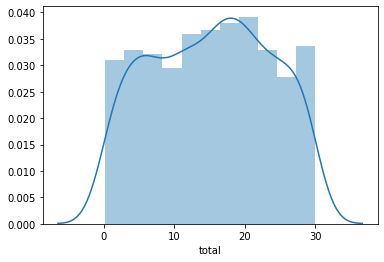

customer_id
0.014188768089697622


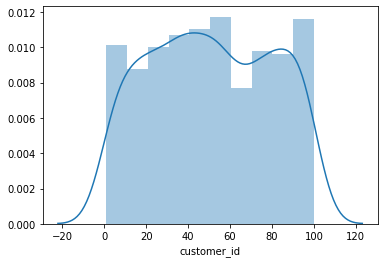

store_id
0.06641427139721619


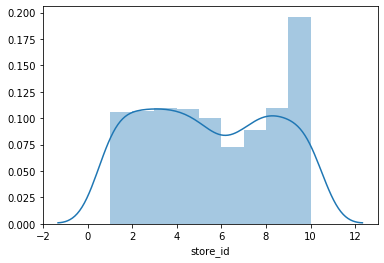

In [153]:
for col in data_order_new:
    print(col)
    print(skew(data_order[col]))
    
    plt.figure()
    sb.distplot(data_order[col])
    plt.show()

# Creating a Dataframe with Monthly total orders and revenue for each store

Merging two datasets to map the Store_id with Store Name

In [597]:
store_name = pd.merge(data_order,data_store,left_on = 'store_id',right_on = 'id',how ='left',indicator = True)

In [598]:
store_name.head()

,id_x,total,customer_id,store_id,order_date,Year,Month,id_y,name,address,_merge
0,1,19.36,21,1,3/3/2020,2020,March,1,Valdez Inc,"18321 Joseph Lodge\nChristineland, NH 69026",both
1,2,8.85,88,8,4/2/2020,2020,April,8,"Martinez, Marsh and Gomez","1434 Shelby Streets Apt. 134\nWest Austin, SD ...",both
2,3,5.53,41,3,3/3/2020,2020,March,3,Taylor Ltd,"3433 Hill Forest\nCharlesmouth, KY 16037",both
3,4,12.90,96,8,3/15/2020,2020,March,8,"Martinez, Marsh and Gomez","1434 Shelby Streets Apt. 134\nWest Austin, SD ...",both
4,5,8.19,25,7,1/21/2020,2020,January,7,Hall Inc,23446 Brittney Isle Apt. 423\nSouth Victoriabe...,both


In [606]:
revenue = pd.DataFrame(store_name,columns =['Year','Month' ,'name','id_x','total'])

In [607]:
Storewise_data = revenue.groupby(['Year',"Month","name"]).agg({'id_x':'count','total':sum})

In [608]:
Storewise_data.rename(columns = {'name' :'Store Name','id_x':'Number of orders','total':'Total Revenue'},inplace = True)

In [610]:
Storewise_data

Number of orders  Total Revenue
Year Month    name                                                      
2020 April    Adams, Barrett and Thomas                27         354.82
              Edwards-Mcdaniel                         30         416.12
              Hall Inc                                 25         391.25
              Henderson, Olson and Ward                24         319.29
              Martinez, Marsh and Gomez                23         361.04
              Scott-Brown                              20         391.18
              Stevens-Barr                             24         343.31
              Taylor Ltd                               24         393.15
              Valdez Inc                               26         406.61
              Young Group                              26         366.12
     February Adams, Barrett and Thomas                24         436.31
              Edwards-Mcdaniel                         22         439.02
              Hall Inc                                 22         381.18
              Henderson, Olson and Ward                25         342.60
              Martinez, Marsh and Gomez                33         442.74
              Scott-Brown                              19         274.21
              Stevens-Barr                             24         322.05
              Taylor Ltd                               27         343.66
              Valdez Inc                               25         383.29
              Young Group                              26         404.18
     January  Adams, Barrett and Thomas                27         315.79
              Edwards-Mcdaniel                         18         280.72
              Hall Inc                                 21         348.17
              Henderson, Olson and Ward                23         282.65
              Martinez, Marsh and Gomez                17         222.38
              Scott-Brown                              18         216.82
              Stevens-Barr                             27         455.03
              Taylor Ltd                               28         450.72
              Valdez Inc                               24         357.64
              Young Group                              15         271.67
     March    Adams, Barrett and Thomas                27         430.58
              Edwards-Mcdaniel                         29         428.32
              Hall Inc                                 19         286.01
              Henderson, Olson and Ward                23         312.72
              Martinez, Marsh and Gomez                36         573.24
              Scott-Brown                              13         197.24
              Stevens-Barr                             31         488.47
              Taylor Ltd                               26         428.81
              Valdez Inc                               29         463.58
              Young Group                              23         356.60
     May      Adams, Barrett and Thomas                 4          90.45
              Edwards-Mcdaniel                          1          24.43
              Hall Inc                                  2          44.05
              Henderson, Olson and Ward                 3          60.27
              Martinez, Marsh and Gomez                 1          19.53
              Scott-Brown                               3          14.17
              Stevens-Barr                              1          24.61
              Taylor Ltd                                5          83.29
              Valdez Inc                                2          39.25
              Young Group                               8         114.65

# Converting Dataframe into an Excel file

In [603]:
Storewise_data.to_csv('C:\\Users\\sreeram\\Desktop\\personal info\\FoodHub\\Monthly_Revenue.csv')

 The Monthly Revenue of each store has been analyzed and the aggregate table has also been converted into a CSV file format.

# Getting the cutsomers who have places less than 10 orders


In [428]:
data_cus = pd.read_csv('C:\\Users\\sreeram\\Desktop\\personal info\\FoodHub\\level2codingtest\\customer_test (2).csv')

Finding the null values

In [429]:
data_cus.isnull().sum()/len(data_cus)*100

id            0.0
first_name    0.0
last_name     0.0
email         0.0
dtype: float64

In [431]:
data_cus.shape

(100, 4)

In [432]:
data_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          100 non-null    int64 
 1   first_name  100 non-null    object
 2   last_name   100 non-null    object
 3   email       100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.2+ KB


All the fields are categorical except the coulmn "ID"

Merging two different datasets

In [433]:
customer = pd.merge(data_order,data_cus,left_on = 'customer_id',right_on = 'id',how = 'left',indicator = True)

Encrypting the user email address

In [522]:
import hashlib

In [523]:
customer['email'] = customer['email'].apply(lambda x : hashlib.md5(x.encode()).hexdigest())

In [524]:
customer.head()

,id_x,total,customer_id,store_id,order_date,Year,Month,id_y,first_name,last_name,email,_merge
0,1,19.36,21,1,3/3/2020,2020,3,21,Alexis,Ferguson,e816835bf4752b6e98f4a1b74b070234,both
1,2,8.85,88,8,4/2/2020,2020,4,88,Christopher,Diaz,e88ad9ea88d72d042fdea2902ef27d22,both
2,3,5.53,41,3,3/3/2020,2020,3,41,Rebecca,Little,966e74e7a1d4a81342696d9acd022c62,both
3,4,12.90,96,8,3/15/2020,2020,3,96,Leah,Sandoval,811355a529e0c903146bb75ce0e8ddee,both
4,5,8.19,25,7,1/21/2020,2020,1,25,Richard,Peterson,c637e9b68f817c6e2282aa124846a6ae,both


In [525]:
customer_df = pd.DataFrame(customer,columns=["first_name",'last_name','email','customer_id'])

In [572]:
final_data = customer_df.groupby(['first_name','last_name','email','customer_id']).agg({'customer_id':'count'})

In [575]:
final_data = final_data.rename(columns = {'customer_id':'orders placed by user'})

In [588]:
order_by_user = final_data[final_data['orders placed by user'].values<10]

In [589]:
order_by_user

orders placed by user
first_name last_name  email                            customer_id                       
Alexandria Alvarado   6c5e7059be20c0fc930df3624e16f9a7 5                                4
Alicia     Martinez   73d4e1335c8b73f4498e6626791ae013 63                               6
Angela     Oneal      f2137375b2faa52d3c598b0963187c9a 29                               7
           Taylor     10b39830a7ba957429d57e89ad7a4feb 20                               9
Beverly    Barnes     79a0ea032f92e7993ea7431f2a582b5e 19                               5
Brian      Riley      32c074fa19009a10e6a906b960151c4b 83                               8
Brooke     Brown      56d085f32f17825b3f70c4529803a7ed 32                               9
Charles    Randall    7648732290f1d67c958bad1dff4f46d5 73                               7
Dale       Sanders    f4dbaf5d6abecd487f82334edec609b1 77                               7
David      Collins    050ec448b62eb2f80f05d84e477fa1d8 39                               8
Dennis     Knapp      ca529c3ef1f75771b2cf6e1daebe53e3 57                               9
Francis    Smith      1ba4b9f41b984914a39f915800427e37 27                               9
Heather    Dennis     7a1dc931bb736ddcac1426bd7de5db51 59                               9
Hector     Hayden     edd568df453b10c43d9406864047d088 37                               9
James      Washington 71a32f6bd1ba1407a89a7d42323391a0 10                               8
Jamie      Shah       a7adaec26ca18e56b58f1d3bcf356997 53                               9
Jason      Moore      b5075cf22f983d637daaeaea3fd281c4 40                               7
Jennifer   Collins    6c98acd6b8b7d82b2dda93358f7b7d66 80                               9
           Jones      d0bf0e4ec96c6f3ba89c8b3061d43afa 47                               6
Jeremy     Shaw       2f40dfd43fa285d19c7262d31e008c81 90                               7
Joanna     Terry      f9477c84df3fa1addf8fb94a5bd41b6c 86                               7
Johnny     Campbell   0cc70fe75f583592ebd844bf22660859 72                               8
Katherine  Johnson    b4ea219b3ca7e51251a24b4226b05d1d 12                               8
Kayla      West       a201a2f75986c62a6a7861c568c01afe 33                               8
Latoya     Smith      a928d28dcb1cb225eece9759355b7bf5 15                               9
Lee        Williams   6e88dc3000d1130acf038bfae39e8116 93                               7
Linda      Kelley     7c6d9cfe9505ce2304207cf96ebe15cc 48                               9
Lisa       Mckay      c146b7fba37684f0b397280f9c717687 61                               6
           Olsen      4a994706a21b707f115bbbec09eefb05 11                               7
Manuel     Anderson   6e66f2f4bff15fa9719fb34bc10dbdf3 85                               6
Melissa    Cooke      5bce1b9e424cf4f54946e4a705d27f74 66                               6
Melvin     Stone      e6deb931b67402a69947e84a7f92de29 13                               5
Meredith   French     98184d7fe4f3610f628d7e98fa7af09d 89                               9
Michelle   Bridges    80badfc300534d4506fb7404263981a1 23                               7
Nichole    Morris     585265c94b51e011901e46c0c348ad45 62                               7
Olivia     Hudson     335444f3cbb088d2ed90ef32bd456555 100                              8
Paul       Smith      03fab0b43d2e3b7f59b991b5cc0d47c6 14                               8
Regina     Barber     8eb7b87ac1f3fc59e067a0d1162aab43 84                               6
Richard    Peterson   c637e9b68f817c6e2282aa124846a6ae 25                               8
Ryan       Le         ce4959a23975d2833727c49b63bcbc7c 98                               8
           Robinson   e1d7f957f110ac7b8a2d564096cf9a49 64                               6
           Terrell    f7b1672d53d0ae4b07021aea9cf9f143 70                               6
Sara       Ramirez    84d79088d5b6c337797b414f0a537413 1                                9
Shelby     Osborn 

# Converting Dataframe into an Excel file

In [590]:
order_by_user.to_csv('C:\\Users\\sreeram\\Desktop\\personal info\\FoodHub\\Users_placed_less_than 10 orders.csv')

User details who have placed less than 10 orders has been exported to CSV file format